# Q1

In [1]:
# import libraries

from math import sqrt
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
import sklearn.metrics as met
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix
from mlxtend.plotting import plot_decision_regions

## 1. Create the dataset

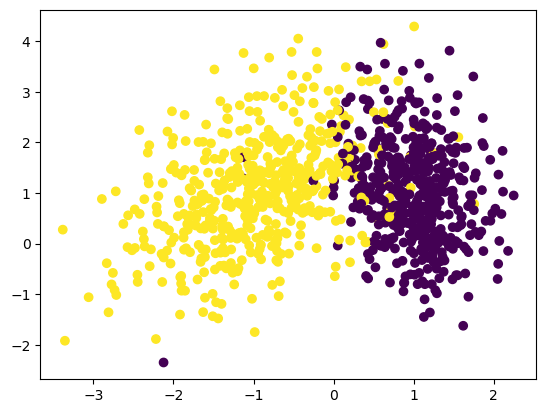

In [2]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_classes=2, class_sep=1 , n_clusters_per_class=1, random_state=93)
plt.scatter(X[:, 0], X[:, 1], c=y)

## 2. train-test-split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=93)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

### 2-1. Logistic Regression

In [4]:
# modeling

model1 = LogisticRegression(solver='lbfgs', max_iter=2000, multi_class='ovr', penalty='l2', random_state=93)
model1.fit(X_train, y_train);

In [5]:
# prediction

ypred1 = model1.predict(X_test)
ypred1_2 = model1.predict_proba(X_test)
ypred1_3 = model1.predict_log_proba(X_test)
ypred1, y_test

(array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
        1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
        1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
        0, 1]),
 array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 1,

In [6]:
# score
# accuracy

a = model1.score(X_train, y_train)
b = model1.score(X_test, y_test)
[a, b]

[0.94625, 0.95]

In [7]:
# error
a = met.mean_squared_error(y_test, ypred1)     # MSE
b = mean_absolute_error(y_test, ypred1)        # MAE
c = sqrt(mean_squared_error(y_test, ypred1))   # SMSE
[a, b, c]

[0.05, 0.05, 0.22360679774997896]

In [8]:
# confusion matrix
confusion_matrix(y_test, ypred1)

array([[104,   3],
       [  7,  86]], dtype=int64)

### 2-2. SGD Classifier

In [9]:
# modeling

model2 = SGDClassifier(loss='log_loss', random_state=93)
model2.fit(X_train, y_train);

In [10]:
# prediction

ypred2 = model2.predict(X_test)
ypred2_2 = model2.predict_proba(X_test)
ypred2_3 = model2.predict_log_proba(X_test)
ypred2, y_test

(array([1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
        1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
        1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
        0, 1]),
 array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 1,

In [11]:
# score
# accuracy

a = model2.score(X_train, y_train)
b = model2.score(X_test, y_test)
[a, b]

[0.93, 0.895]

In [12]:
# error
a = met.mean_squared_error(y_test, ypred2)     # MSE
b = mean_absolute_error(y_test, ypred2)        # MAE
c = sqrt(mean_squared_error(y_test, ypred2))   # SMSE
[a, b, c]

[0.105, 0.105, 0.324037034920393]

In [13]:
# confusion matrix
confusion_matrix(y_test, ypred2)

array([[92, 15],
       [ 6, 87]], dtype=int64)

## 3. Decision Boundary

<Axes: >

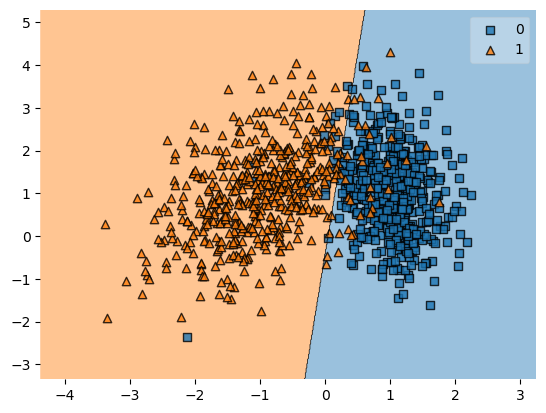

In [14]:
# Logistic Regression
plot_decision_regions(X, y , clf=model1)

C:\Users\Zahra\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


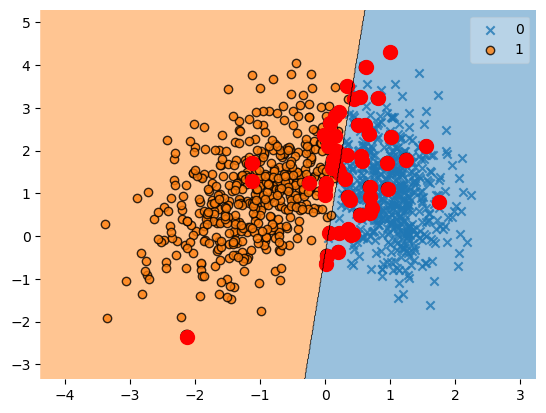

In [15]:
# Logistic Regression
ypred11 = model1.predict(X)
misclassified1 = ypred11 != y
plot_decision_regions(X, y, clf=model1, markers='xo', X_highlight=X[misclassified1])
plt.scatter(X[misclassified1][:, 0], X[misclassified1][:, 1], c='red', marker='o', s=100, label='Misclassified')
plt.show()

<Axes: >

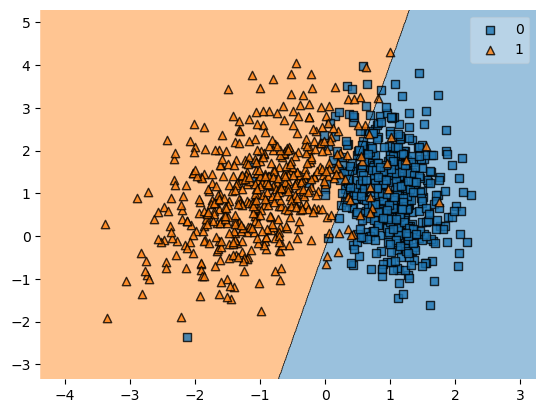

In [16]:
# SGD Classifier
plot_decision_regions(X, y , clf=model2)

C:\Users\Zahra\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


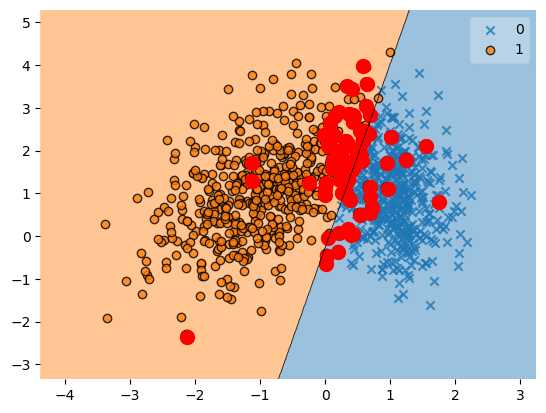

In [17]:
# SGD Classifier
ypred22 = model2.predict(X)
misclassified2 = ypred22 != y
plot_decision_regions(X, y, clf=model2, markers='xo', X_highlight=X[misclassified2])
plt.scatter(X[misclassified2][:, 0], X[misclassified2][:, 1], c='red', marker='o', s=100, label='Misclassified')
plt.show()

## 4. Challenging the question

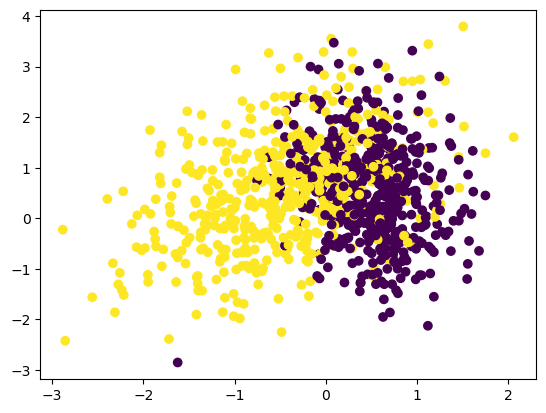

In [18]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_classes=2, class_sep=0.5 , n_clusters_per_class=1, random_state=93)
plt.scatter(X[:, 0], X[:, 1], c=y)

### 4-(2).  train-test-split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=93)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

#### 4-(2-1).  Logistic Regression

In [20]:
# modeling

model1 = LogisticRegression(solver='lbfgs', max_iter=2000, multi_class='ovr', penalty='l2', random_state=93)
model1.fit(X_train, y_train);

In [21]:
# prediction

ypred1 = model1.predict(X_test)
ypred1_2 = model1.predict_proba(X_test)
ypred1_3 = model1.predict_log_proba(X_test)
ypred1, y_test

(array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
        1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
        1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
        0, 1]),
 array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 1,

In [22]:
# score
# accuracy 

a = model1.score(X_train, y_train)
b = model1.score(X_test, y_test)
[a, b]

[0.7925, 0.78]

In [23]:
# error
a = met.mean_squared_error(y_test, ypred1)     # MSE
b = mean_absolute_error(y_test, ypred1)        # MAE
c = sqrt(mean_squared_error(y_test, ypred1))   # SMSE
[a, b, c]

[0.22, 0.22, 0.469041575982343]

In [24]:
# confusion matrix
confusion_matrix(y_test, ypred2)

array([[92, 15],
       [ 6, 87]], dtype=int64)

#### 4-(2-2).  SGD Classifier

In [25]:
# modeling

model2 = SGDClassifier(loss='log_loss', random_state=93)
model2.fit(X_train, y_train);

In [26]:
# prediction

ypred2 = model2.predict(X_test)
ypred2_2 = model2.predict_proba(X_test)
ypred2_3 = model2.predict_log_proba(X_test)
ypred2, y_test

(array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
        1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
        1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
        0, 1]),
 array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 1,

In [27]:
# score
# accuracy

a = model2.score(X_train, y_train)
b = model2.score(X_test, y_test)
[a, b]

[0.77625, 0.775]

In [28]:
# error
a = met.mean_squared_error(y_test, ypred2)     # MSE
b = mean_absolute_error(y_test, ypred2)        # MAE
c = sqrt(mean_squared_error(y_test, ypred2))   # SMSE
[a, b, c]

[0.225, 0.225, 0.4743416490252569]

In [29]:
# confusion matrix
confusion_matrix(y_test, ypred2)

array([[75, 32],
       [13, 80]], dtype=int64)

### 4-(3).  Decision Boundary

<Axes: >

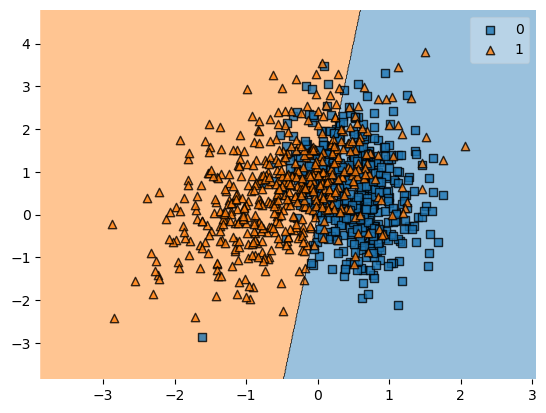

In [30]:
# Logistic Regression
plot_decision_regions(X, y , clf=model1)

C:\Users\Zahra\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


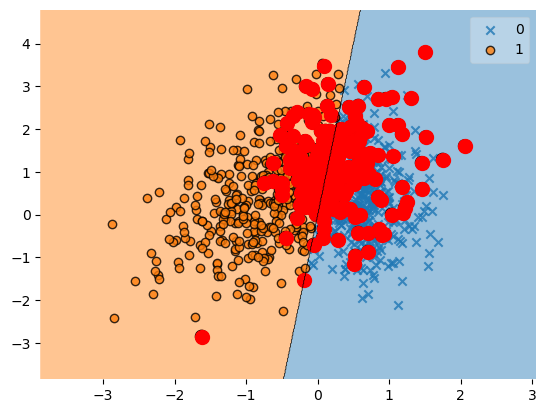

In [31]:
# Logistic Regression
ypred11 = model1.predict(X)
misclassified1 = ypred11 != y
plot_decision_regions(X, y, clf=model1, markers='xo', X_highlight=X[misclassified1])
plt.scatter(X[misclassified1][:, 0], X[misclassified1][:, 1], c='red', marker='o', s=100, label='Misclassified')
plt.show()

<Axes: >

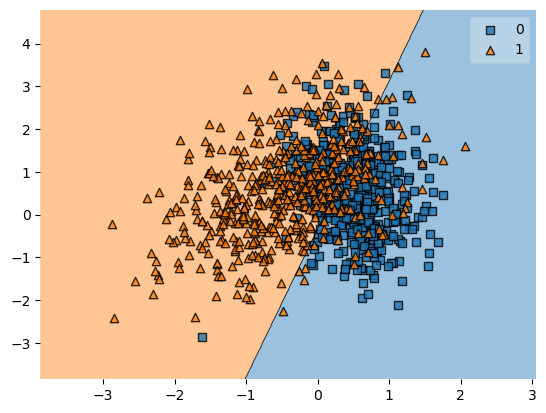

In [32]:
# SGD Classifier
plot_decision_regions(X, y , clf=model2)

C:\Users\Zahra\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


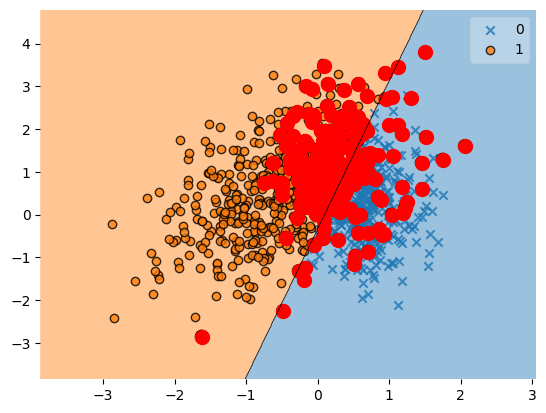

In [33]:
# SGD Classifier
ypred22 = model2.predict(X)
misclassified2 = ypred22 != y
plot_decision_regions(X, y, clf=model2, markers='xo', X_highlight=X[misclassified2])
plt.scatter(X[misclassified2][:, 0], X[misclassified2][:, 1], c='red', marker='o', s=100, label='Misclassified')
plt.show()

## 5. Adding a new class

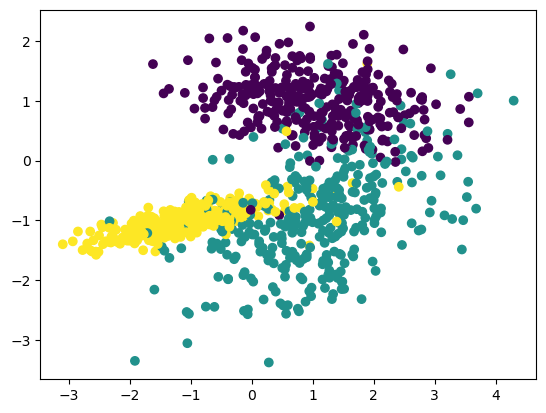

In [34]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_classes=3, class_sep=1 , n_clusters_per_class=1, random_state=93)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=93)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [36]:
# modeling

model1 = LogisticRegression(solver='lbfgs', max_iter=2000, multi_class='multinomial', penalty='l2', random_state=93)
model1.fit(X_train, y_train);
model2 = SGDClassifier(loss='log', random_state=93)
model2.fit(X_train, y_train);

C:\Users\Zahra\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [37]:
# prediction
# Logistic Regression

ypred1 = model1.predict(X_test)
ypred1_2 = model1.predict_proba(X_test)
ypred1_3 = model1.predict_log_proba(X_test)
ypred1, y_test

(array([0, 0, 2, 1, 1, 1, 0, 2, 2, 0, 2, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 0,
        0, 2, 1, 0, 2, 2, 1, 1, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 1,
        0, 0, 1, 2, 1, 1, 2, 2, 2, 1, 0, 1, 0, 1, 2, 0, 0, 2, 1, 2, 1, 0,
        2, 2, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 0, 1,
        0, 2, 1, 0, 1, 1, 1, 2, 2, 2, 2, 1, 2, 0, 1, 1, 0, 0, 2, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 2, 0, 1, 0, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 2,
        1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 0, 2, 2, 2, 1, 2, 1, 2, 1,
        2, 2, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0, 2, 1, 2, 0, 2, 1, 0, 1, 1,
        1, 2, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0, 1, 1,
        2, 0]),
 array([0, 0, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 0,
        0, 2, 2, 0, 2, 2, 1, 1, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 1, 2, 1,
        0, 0, 1, 2, 2, 1, 2, 2, 2, 1, 0, 1, 0, 0, 2, 0, 0, 2, 1, 2, 1, 0,
        2, 2, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 2, 2, 0, 1,
        0, 2, 1, 0, 1,

In [38]:
# SGD Classifier

ypred2 = model2.predict(X_test)
ypred2_2 = model2.predict_proba(X_test)
ypred2_3 = model2.predict_log_proba(X_test)
ypred2, y_test

(array([0, 0, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 0, 1, 2, 1, 0, 0, 2, 1, 2, 0,
        0, 2, 2, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 1, 2, 1,
        0, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 1, 0, 0, 2, 0, 0, 2, 1, 2, 2, 0,
        2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 0, 1,
        0, 2, 0, 0, 1, 0, 2, 2, 2, 2, 2, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 2,
        2, 0, 1, 2, 2, 0, 2, 0, 1, 0, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 2,
        1, 2, 0, 2, 0, 2, 1, 1, 2, 2, 2, 1, 1, 0, 2, 2, 2, 0, 2, 2, 2, 0,
        2, 2, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 1, 1,
        1, 2, 0, 2, 0, 1, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0, 1, 2,
        2, 0]),
 array([0, 0, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 0,
        0, 2, 2, 0, 2, 2, 1, 1, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 1, 2, 1,
        0, 0, 1, 2, 2, 1, 2, 2, 2, 1, 0, 1, 0, 0, 2, 0, 0, 2, 1, 2, 1, 0,
        2, 2, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 2, 2, 0, 1,
        0, 2, 1, 0, 1,

In [39]:
# score
# accuracy
# Logistic Regression

a = model1.score(X_train, y_train)
b = model1.score(X_test, y_test)
[a, b]

[0.885, 0.895]

In [40]:
# SGD Classifier

a = model2.score(X_train, y_train)
b = model2.score(X_test, y_test)
[a, b]

[0.84125, 0.845]

In [41]:
# error
# Logistic Regression

a = met.mean_squared_error(y_test, ypred1)     # MSE
b = mean_absolute_error(y_test, ypred1)        # MAE
c = sqrt(mean_squared_error(y_test, ypred1))   # SMSE
[a, b, c]

[0.12, 0.11, 0.34641016151377546]

In [42]:
# SGD Classifier

a = met.mean_squared_error(y_test, ypred2)     # MSE
b = mean_absolute_error(y_test, ypred2)        # MAE
c = sqrt(mean_squared_error(y_test, ypred2))   # SMSE
[a, b, c]

[0.17, 0.16, 0.41231056256176607]

In [43]:
# confusion matrix
# Logistic Regression

confusion_matrix(y_test, ypred1)

array([[61,  3,  0],
       [ 3, 58,  4],
       [ 1, 10, 60]], dtype=int64)

In [44]:
# SGD Classifier

confusion_matrix(y_test, ypred2)

array([[64,  0,  0],
       [14, 38, 13],
       [ 1,  3, 67]], dtype=int64)

<Axes: >

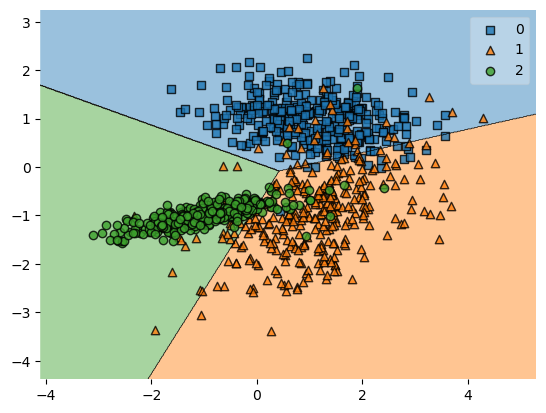

In [45]:
# Decision Boundary
# Logistic Regression

plot_decision_regions(X, y , clf=model1)

C:\Users\Zahra\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


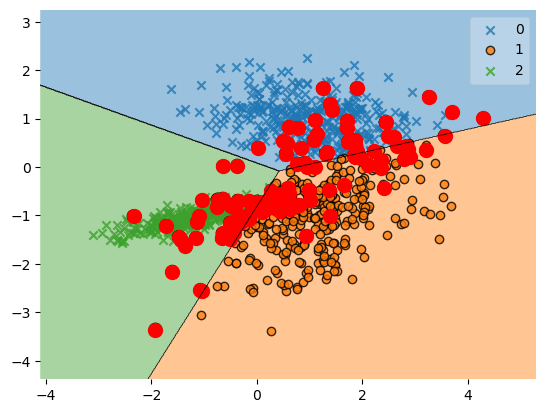

In [46]:
# Logistic Regression

ypred11 = model1.predict(X)
misclassified1 = ypred11 != y
plot_decision_regions(X, y, clf=model1, markers='xo', X_highlight=X[misclassified1])
plt.scatter(X[misclassified1][:, 0], X[misclassified1][:, 1], c='red', marker='o', s=100, label='Misclassified')
plt.show()

<Axes: >

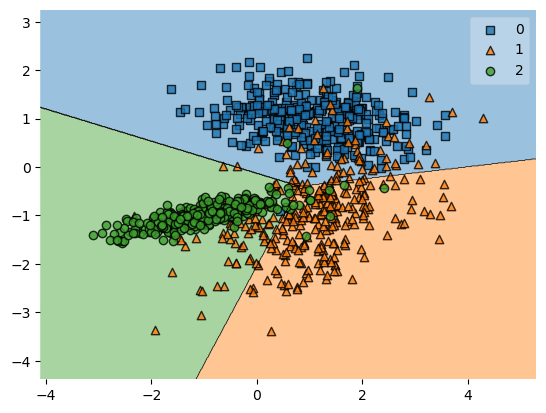

In [47]:
# Decision Boundary
# SGD Classifier

plot_decision_regions(X, y , clf=model2)

C:\Users\Zahra\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


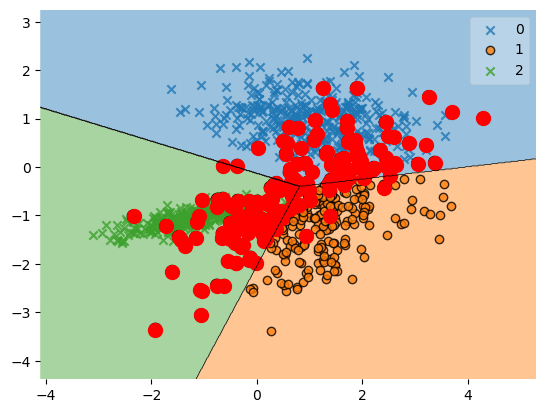

In [48]:
# SGD Classifier

ypred22 = model2.predict(X)
misclassified2 = ypred22 != y
plot_decision_regions(X, y, clf=model2, markers='xo', X_highlight=X[misclassified2])
plt.scatter(X[misclassified2][:, 0], X[misclassified2][:, 1], c='red', marker='o', s=100, label='Misclassified')
plt.show()